# Загрузка Pandas и очистка данных

In [105]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np  # для работы с массивами
import pandas as pd  # для работы с DataFrame
import ast

%matplotlib inline

# множественный вывод из одной ячейки
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows=105
pd.options.display.max_columns=105

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# читаем и размечаем колонки на понятные названия
df = pd.read_csv('main_task_new.csv')
df.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
              'price_range', 'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA']

In [5]:
# functions and procedures for organizing data

def review2list(string):  # transform review from string to list, transform date to_datetime
    if string == '[[], []]':
        string = [None, None, None, None]
        return string

    if isinstance(string, str):
        string = string.replace('[', '').replace(
            ']', '').replace("'", '').split(',')

        string1 = []
        for item in string:
            date_format = '%m/%d/%Y'

            try:
                item = pd.to_datetime(item[1:], format=date_format)
                string1.append(item)
            except ValueError:
                string1.append(item)
            except TypeError:
                string1.append(item)

            else:
                None
            finally:
                string1

    return string1


def dollar2rating(x):  # convert $$ to 0-1-2
    dict = {0: 0, '$': 1, '$$ - $$$': 3, '$$$$': 8}

    try:
        return dict[x]
    except KeyError:
        print(x)
#     if x == '$' or x=='0':
#         return 0
#     elif x == '$$ - $$$' or x=='1':
#         return 1
#     elif x == '$$$$' or x=='2':
#         return 2
#     else:
#         return 0


# was made for cleaning initial column, but now just get_dummies and concatinate
def make_dummies(dframe, column):
    _col = pd.get_dummies(dframe[column], drop_first=False)
#     dframe = dframe.drop(column, axis=1)
    return pd.concat([dframe, _col], axis=1)


# def countdays_review(r_list): count days between two reviews
#     between = r_list[3]-r_list[2]
#     return abs(between.days)


# def days_between():   #

In [6]:
# num_rev_nan=df.number_of_reviews.isna()
# df[(df.reviews=='[[], []]') & (df.number_of_reviews.isna()==False)]

In [7]:
# кухни приводим к списку, если нет информации о кухне - None
df.cuisine_style = df.cuisine_style.fillna('None')
df.cuisine_style = df.cuisine_style.apply(ast.literal_eval)
df.reviews = df.reviews.apply(lambda x: review2list(x))

In [8]:
# процедура, которая заполняет столбец between значением дней между последними двумя отзывами

df['between'] = 0  # создем столбец between

for x in range(df.reviews.shape[0]):
    try:
        df.between.iloc[x] = abs(df.reviews[x][-1]-df.reviews[x][-2]).days
    except TypeError:
        df.between.iloc[x] = 0

In [9]:
# pako=df
# df.price_range[:15]
df.price_range = df.price_range.fillna(0)
df.price_range = df.price_range.apply(dollar2rating)  # меняем доллары на 0-1-2
# df.price_range[:15]

In [10]:
# df[df.city=='Oporto'].city='Porto'

In [11]:
# dummie variabes for cuisine type, из списка
df1 = pd.DataFrame()
df1 = pd.DataFrame(df.cuisine_style)
s = df1['cuisine_style']
dummy_dat = pd.get_dummies(
    s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
df = pd.concat([df, dummy_dat], axis=1)

df = make_dummies(df, 'city')  # делаем дурацкие переменные для города

In [152]:
# считаем слова в отличных отзывах в словарь
import operator
perf_word = {}
ind_r = 0
test = df[(df.rating == 4) | (df.rating == 5)]
for ind in test.reviews:
    for post in ind[0:-2]:
        if isinstance(post, str):
            for word in post.split(' '):
                if word not in perf_word:
                    perf_word[word.lower()] = 1
                else:
                    perf_word[word.lower()] += 1

# сортируем словарь по значениям
sorted_x = sorted(perf_word.items(), key=operator.itemgetter(1))
# 100 слов чаще всех встречающиеся в отличных и хороших отзывах
good = sorted_x[-500:]

# считаем слова в плохих отзывах в словарь
perf_word = {}
ind_r = 0
test = df[(df.rating == 1) | (df.rating == 2)]
for ind in test.reviews:
    for post in ind[0:-2]:
        if isinstance(post, str):
            for word in post.split(' '):
                if word not in perf_word:
                    perf_word[word.lower()] = 1
                else:
                    perf_word[word.lower()] += 1
# сортируем словарь по значениям
sorted_x = sorted(perf_word.items(), key=operator.itemgetter(1))
bad = sorted_x[-500:]  # 100 слов чаще все


def count2list(spisok):
    a = []
    for word in spisok:
        a.append(word[0])
    return a


def clear_word(word):
    bad_sign = ['!', '@', '&', '+', '-', '/', '.', '.', ',',
                '1', '2', '3', '4', '5', '6', '7', '8', '9', '0',':','(',')','%','*','?','"','=']

    for sign in bad_sign:
        count = 0
#         print('watching in ', word, sign)
        if sign in word:
#             print(word, sign)
            word = word.replace(sign, '')
            word=clear_word(word)
    return word

def clear_list(spisok):
    new_spisok=[]
    for word in spisok:
        new_spisok.append(clear_word(word))
    return new_spisok


good = set(count2list(good))
bad = set(count2list(bad))
badlist=set(clear_list(bad))
goodlist=set(clear_list(good))
good=goodlist-badlist
bad=badlist-goodlist


In [155]:
# good
# создаем список слов из лучших отзывов
# best_words = ['super', 'fantastic', 'awesome', 'perfect', 'fabulous', 'wonderful', 'friendly',
#               'tasty', 'lovely', 'amazing', 'authentic', 'great', 'best', 'delicious', 'excellent', 'superb']

In [280]:
# test=df.iloc[0:5]

# функция возвращает каких слов в отзывах больше хороших или плохих
def word_in_list(review,spisok):
    count = 0
    for info in review[0:-2]:
        if isinstance(info, str):
            for word in info.split(' '):
                if clear_word(word.lower()) in spisok:
                    count += 1
                
    return count

# i=test.reviews.iloc[2]
# i
# count_best_words(i,best_words)

In [281]:
df['good'] = df.reviews.apply(lambda x: word_in_list(x,good))
df['bad']=df.reviews.apply(lambda x: word_in_list(x,bad))

In [282]:
df.sample(5)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,URL_TA,ID_TA,between,Afghani,African,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Cafe,Cajun & Creole,Canadian,Caribbean,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ethiopian,European,Fast Food,Filipino,French,...,Fujian,Jamaican,Minority Chinese,Polynesian,Tunisian,Xinjiang,Caucasian,Native American,Salvadoran,Welsh,Yunnan,Azerbaijani,Burmese,Latvian,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,best_words,population,relative_ranking,rest_in_city,chain,good,bad
17970,id_5112,Paris,[French],5113.0,4.0,0,32.0,"[None, None, None, None]",/Restaurant_Review-g187147-d5811510-Reviews-Le...,d5811510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2161,0.957755,4897,4,0,0
39772,id_320,Stockholm,"[Swedish, European, Wine Bar]",321.0,4.5,3,99.0,"[Small and perfect, More than wine, 2017-11-2...",/Restaurant_Review-g189852-d6957708-Reviews-St...,d6957708,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1,975,2.554517,820,13,1,2
3264,id_304,Lyon,"[French, Diner, Wine Bar, Vegetarian Friendly]",305.0,4.5,3,98.0,"[Surprising Find, Funky wine bar, 2017-06-03 ...",/Restaurant_Review-g187265-d3506141-Reviews-We...,d3506141,493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,513,2.924590,892,10,1,0
38931,id_1287,Lisbon,"[Mediterranean, European, Portuguese]",1288.0,3.5,3,182.0,"[Delicious Clams, Surprisingly good!, 2017-11...",/Restaurant_Review-g189158-d969606-Reviews-Flo...,d969606,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,504,1.009317,1300,8,1,0
16768,id_1508,Zurich,"[Italian, European, Pizza, Mediterranean]",1514.0,3.0,3,58.0,"[Over priced badly made pizza, Not to menti.....",/Restaurant_Review-g188113-d1024070-Reviews-Di...,d1024070,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,402,0.355350,538,7,3,1


In [162]:
kano = df  # резервируем текущее состояние таблицы
city_list = set(df.city) # сет городов
city_list = list(city_list) # делаем списком
city_population = {'Bratislava': 424,
                   'Milan': 3200,
                   'Madrid': 3266,
                   'Amsterdam': 872,
                   'Ljubljana': 508,
                   'Dublin': 1173,
                   'Geneva': 200,
                   'Krakow': 766,
                   'Hamburg': 1841,
                   'Lisbon': 504,
                   'Zurich': 402,
                   'Copenhagen': 602,
                   'Vienna': 1897,
                   'Prague': 1309,
                   'Lyon': 513,
                   'Edinburgh': 482,
                   'London': 8982,
                   'Stockholm': 975,
                   'Barcelona': 1620,
                   'Brussels': 174,
                   'Athens': 664,
                   'Paris': 2161,
                   'Berlin': 3645,
                   'Rome': 2873,
                   'Helsinki': 631,
                   'Munich': 1472,
                   'Luxembourg': 632,
                   'Budapest': 1756,
                   'Oslo': 634,
                   'Oporto': 214,
                   'Warsaw': 1765}

city_count = {} # считаем сколько в городе ресторанов
for gorod in city_list:
    city_count[gorod] = df[df.city == gorod]['ID_TA'].nunique()

# df['relative_ranking'] = pd.DataFrame[]
# for gorod in city_count.keys():
#     print(gorod)
#     print(city_count[gorod])
#     df[df.city == gorod].rest_in_city = city_count[gorod]

In [224]:
city_count

{'London': 5757,
 'Geneva': 481,
 'Amsterdam': 1086,
 'Oslo': 385,
 'Oporto': 513,
 'Madrid': 3088,
 'Munich': 893,
 'Brussels': 1060,
 'Ljubljana': 183,
 'Berlin': 2155,
 'Lisbon': 1300,
 'Rome': 2078,
 'Milan': 2133,
 'Hamburg': 949,
 'Lyon': 892,
 'Luxembourg': 210,
 'Athens': 628,
 'Stockholm': 820,
 'Krakow': 443,
 'Bratislava': 301,
 'Edinburgh': 596,
 'Barcelona': 2734,
 'Copenhagen': 659,
 'Warsaw': 727,
 'Budapest': 816,
 'Vienna': 1166,
 'Dublin': 673,
 'Zurich': 538,
 'Helsinki': 376,
 'Paris': 4897,
 'Prague': 1443}

In [ ]:
df.iloc[0].URL_TA

In [ ]:
score=np.array([19,42,20,14,1])
score_weight=np.array([2,1,0,-4,-8])
(score*score_weight).sum()

In [ ]:
import requests
from bs4 import BeautifulSoup
URL_TA=df.iloc[2].URL_TA
url='https://www.tripadvisor.com/%s' % (URL_TA)
r = requests.get(url)
# soup=soup.find_all()
url

In [172]:
df['population']=0
df[df.city=='Paris']['population']=999

In [188]:
city_list=list(city_list)
city_list[0]

'London'

In [211]:
for city in city_list:
    df['population'][df.city==city]=city_population[city]

In [236]:
# df[['city','population','ranking','rating']].sample(10).sort_values(by='rating', ascending=False)
# ввожу относительный рейтинг (учитываю кол-во ресторанов в городе в датасете)
# для этого указыавю столбец кол-во ресторанов в городе
df['rest_in_city'] = df.city.apply(lambda x: city_count[x])
df['relative_ranking'] = df.rest_in_city/df.ranking

,city,population,ranking,rating,rest_in_city,relative_ranking
32005,Paris,2161,12085.0,3.5,4897,0.405213
36149,Amsterdam,872,2455.0,4.5,1086,0.442363
17939,Paris,2161,4770.0,4.0,4897,1.026625
20325,Paris,2161,3080.0,4.5,4897,1.589935
10587,Berlin,3645,536.0,4.0,2155,4.020522
17064,Rome,2873,789.0,4.5,2078,2.633714
803,Berlin,3645,759.0,4.5,2155,2.839262
851,Berlin,3645,4457.0,4.5,2155,0.483509
39903,Lisbon,504,111.0,4.5,1300,11.711712
26149,Budapest,1756,786.0,4.5,816,1.038168


In [250]:
# ввожу еще один признак - сколько ресторанов в сети
rest_in_chain=df.restaurant_id.value_counts()
def is_chain(id):
    return rest_in_chain[id]

df['chain']=df.restaurant_id.apply(lambda x: is_chain(x))

In [265]:
df.drop(['restaurant_id', 'city', 'cuisine_style',
        'reviews', 'URL_TA', 'ID_TA'], axis=1).describe()
df.number_of_reviews[df.number_of_reviews.isna()] = 0

,ranking,rating,price_range,number_of_reviews,between,Afghani,African,American,Arabic,Argentinean,Armenian,Asian,Australian,Austrian,Balti,Bangladeshi,Bar,Barbecue,Belgian,Brazilian,Brew Pub,British,Cafe,Cajun & Creole,Canadian,Caribbean,Central American,Central Asian,Central European,Chilean,Chinese,Colombian,Contemporary,Croatian,Cuban,Czech,Danish,Delicatessen,Diner,Dutch,Eastern European,Ethiopian,European,Fast Food,Filipino,French,Fusion,Gastropub,Georgian,German,Gluten Free Options,Greek,...,Ecuadorean,Egyptian,Fujian,Jamaican,Minority Chinese,Polynesian,Tunisian,Xinjiang,Caucasian,Native American,Salvadoran,Welsh,Yunnan,Azerbaijani,Burmese,Latvian,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,best_words,population,relative_ranking,rest_in_city,chain
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.0000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0000,40000.0000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,3676.028525,3.993037,1.822475,116.889700,102.645675,0.000550,0.00385,0.032875,0.001275,0.004225,0.000350,0.075275,0.000600,0.009500,0.002075,0.001900,0.082425,0.013875,0.006750,0.003175,0.005625,0.039875,0.058125,0.000500,0.000125,0.002325,0.003375,0.000300,0.034825,0.000200,0.028625,0.000500,0.013075,0.000675,0.000575,0.014875,0.004425,0.00980,0.007375,0.007350,0.012400,0.001050,0.251500,0.042625,0.000300,0.079750,0.014425,0.011775,0.000425,0.016550,0.102825,0.015100,...,0.0001,0.000500,0.000050,0.000625,0.000275,0.000050,0.000525,0.000025,0.0001,0.0001,0.000025,0.000050,0.000025,0.000050,0.000025,0.000025,0.027150,0.015700,0.068350,0.053875,0.007525,0.026500,0.020400,0.016475,0.016825,0.014900,0.012025,0.023725,0.009400,0.011075,0.032500,0.004575,0.143925,0.005250,0.022300,0.077700,0.053325,0.022325,0.012825,0.009625,0.122425,0.036075,0.051950,0.020500,0.029150,0.018175,0.013450,-0.005375,2848.277550,3.373898,2564.446000,6.439550
std,3708.749567,0.668417,1.804201,287.729821,198.594208,0.023446,0.06193,0.178312,0.035685,0.064863,0.018705,0.263838,0.024488,0.097005,0.045505,0.043548,0.275015,0.116974,0.081882,0.056258,0.074790,0.195668,0.233983,0.022355,0.011180,0.048163,0.057997,0.017318,0.183339,0.014141,0.166752,0.022355,0.113597,0.025972,0.023973,0.121054,0.066374,0.09851,0.085562,0.085418,0.110664,0.032387,0.433881,0.202013,0.017318,0.270909,0.119236,0.107873,0.020611,0.127579,0.303734,0.121952,...,0.0100,0.022355,0.007071,0.024992,0.016581,0.007071,0.022907,0.005000,0.0100,0.0100,0.005000,0.007071,0.005000,0.007071,0.005000,0.005000,0.162522,0.124314,0.252349,0.225774,0.086421,0.160619,0.141366,0.127295,0.128617,0.121154,0.108999,0.152193,0.09

Series([], Name: number_of_reviews, dtype: float64)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [344]:
df = df.dropna()

In [345]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['restaurant_id', 'city', 'cuisine_style',
            'reviews', 'URL_TA', 'ID_TA','rating'], axis=1)
# X.price_range.value_counts()
y = df['rating']

In [346]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [347]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [348]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [349]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

RandomForestRegressor()

In [352]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('max_error:', metrics.max_error(y_test, y_pred))
print('median_absolute_error', metrics.median_absolute_error(y_test, y_pred))
print('MPE: ', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE: 0.20907161458333334
max_error: 3.8449999999999998
median_absolute_error 0.15000000000000036
MPE:  0.05667727296213624


<AxesSubplot:>

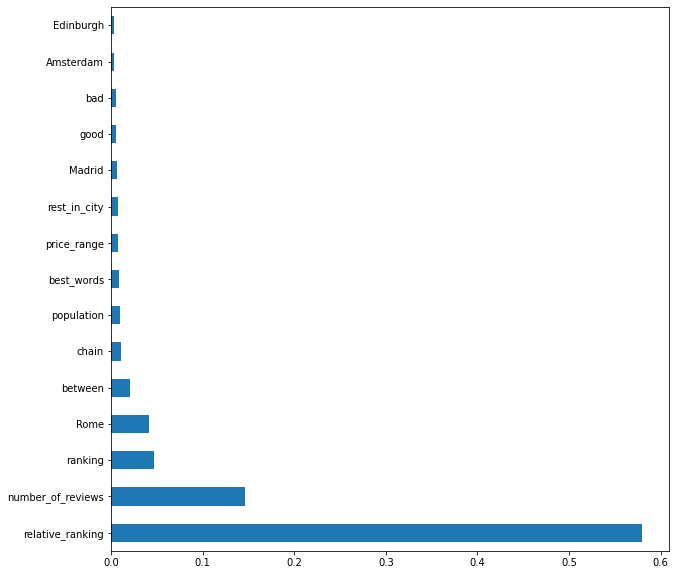

In [351]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')